<a href="https://colab.research.google.com/github/BaranikumarNagarajan/Brain-Tumor-Classification-Using-CNN-on-MRI-Images/blob/main/Brain_Tumor_Classification_Using_CNN_on_MRI_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [9]:
import zipfile

with zipfile.ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [21]:
import os

print(os.listdir('data'))
print(os.listdir('data/Brain_Cancer raw MRI data'))
print(os.listdir('data/Brain_Cancer raw MRI data/Brain_Cancer'))

['dataset.csv', 'Brain_Cancer raw MRI data', 'Data', 'er"']
['Brain_Cancer']
['brain_menin', 'brain_glioma', 'brain_tumor']


In [23]:
data_dir = 'data/Brain_Cancer raw MRI data/Brain_Cancer'


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4847 images belonging to 3 classes.
Found 1209 images belonging to 3 classes.


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.5978 - loss: 0.8117 - val_accuracy: 0.7792 - val_loss: 0.5215
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.7884 - loss: 0.5239 - val_accuracy: 0.8147 - val_loss: 0.4509
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.8410 - loss: 0.4038 - val_accuracy: 0.8238 - val_loss: 0.4090
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.8510 - loss: 0.3727 - val_accuracy: 0.8536 - val_loss: 0.4332
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.8822 - loss: 0.2910 - val_accuracy: 0.8718 - val_loss: 0.3384
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.9166 - loss: 0.2206 - val_accuracy: 0.8710 - val_loss: 0.3171
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9538 - loss: 0.1271 - val_accuracy: 0.8867 - val_loss: 0.2988
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9635 - loss: 0.1053 - val_accura

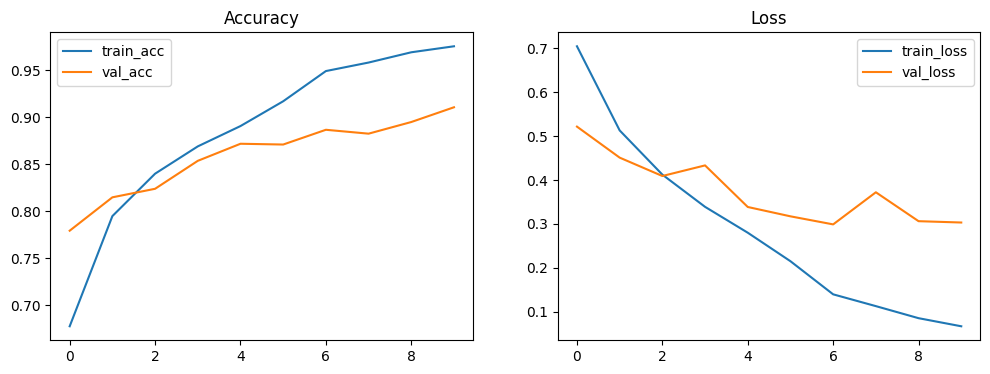

In [27]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()

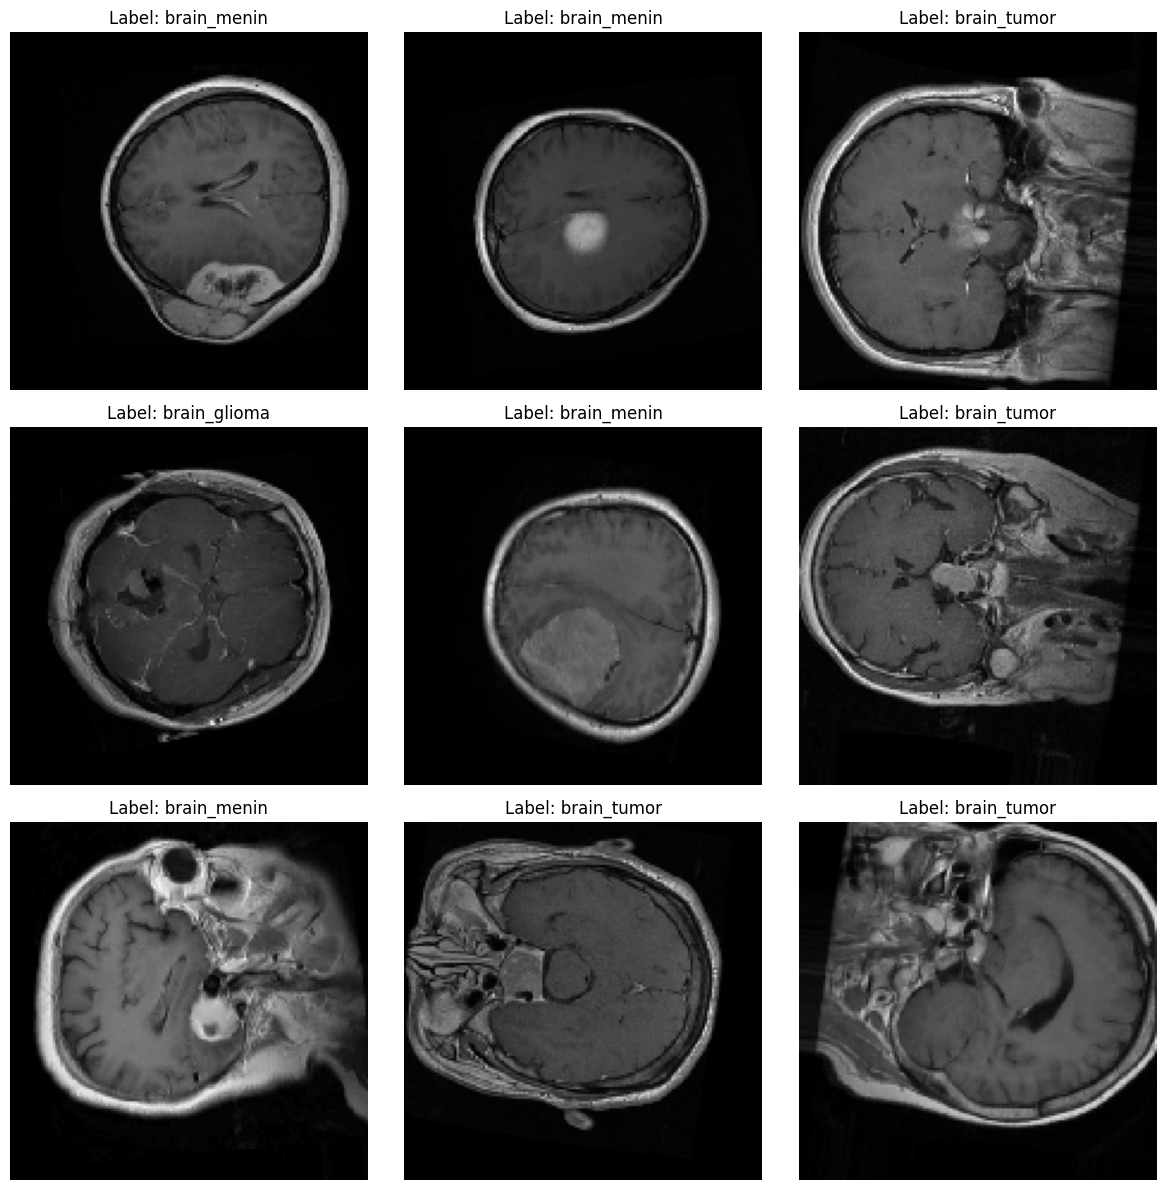

In [28]:
# Get one batch of images and labels
images, labels = next(train_gen)

# Class names (you can get this from train_gen.class_indices)
class_names = list(train_gen.class_indices.keys())

# Plot first 9 images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [29]:
val_images, val_labels = next(val_gen)
predictions = model.predict(val_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)
class_labels = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print("Classification Report:\n", report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
 [[11  0  0]
 [ 3  8  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

brain_glioma       0.79      1.00      0.88        11
 brain_menin       1.00      0.73      0.84        11
 brain_tumor       1.00      1.00      1.00        10

    accuracy                           0.91        32
   macro avg       0.93      0.91      0.91        32
weighted avg       0.93      0.91      0.90        32



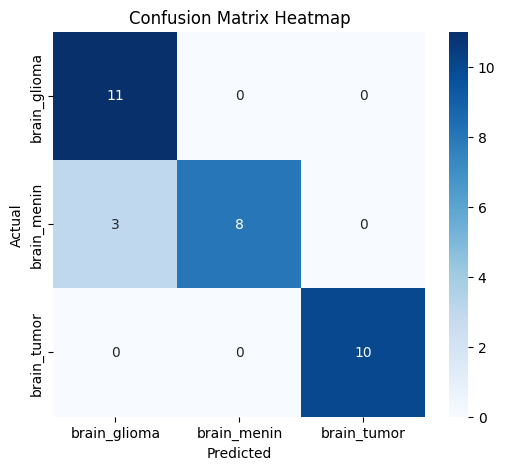

In [30]:
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<ipython-input-31-882e8faef833>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_dir = data_dir

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


Found 6056 images belonging to 3 classes.
